<a href="https://colab.research.google.com/github/Ayryslaine/analise_sobrevivencia_titanic/blob/main/An%C3%A1lise_de_Sobreviv%C3%AAncia_do_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ATIVIDADE: PROBLEMA - ANÁLISE DE SOBREVIVÊNCIA NO TITANIC**

**Professor: Albaro Ramon Paiva Sanz**

**Equipe: Ayryslaine Kelle, Brenno Vale e Jeová Anderson**

**Problema de Negócio:
Como cientista de dados contratado pela comissão de investigação do acidente, você foi encarregado de analisar os padrões de sobrevivência para responder à pergunta fundamental: “QUAIS TIPOS DE PESSOAS TÊM A MAIOR PROBABILIDADE DE SOBREVIVER AO NAUFRÁGIO DO TITANIC?"**

**Objetivo Principal:
Identificar e caracterizar os perfis demográficos e socioeconômicos que tiveram
maiores taxas de sobrevivência durante o naufrágio.**

# Importando bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly.express as px
import plotly.graph_objects as go

# Importando banco de dados da atividade

In [ ]:
df = pd.read_csv("/content/titanic_data.csv", sep=",")

# Visualização do banco de dados

In [ ]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"1,0,3,""Braund, Mr. Owen Harris"",male,22.0,1,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,1,1,""Cumings, Mrs. John Bradley (Florence Br...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"3,1,3,""Heikkinen, Miss. Laina"",female,26.0,0,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4,1,1,""Futrelle, Mrs. Jacques Heath (Lily May ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"5,0,3,""Allen, Mr. William Henry"",male,35.0,0,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"887,0,2,""Montvila, Rev. Juozas"",male,27.0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,"888,1,1,""Graham, Miss. Margaret Edith"",female,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,"889,0,3,""Johnston, Miss. Catherine Helen """"Car...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,"890,1,1,""Behr, Mr. Karl Howell"",male,26.0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ao exibir o conteúdo do DataFrame df após a leitura do arquivo titanic_datas.
csv, todas as colunas aparecem com valores NaN, enquanto a primeira coluna contém toda a linha em formato de texto

**(ex: "1,0,3,"Braund, Mr. Owen Harris",male,22,0,1,...").**

Isso indica que o arquivo CSV foi interpretado incorretamente, e o pandas não reconheceu o separador de campos (,).

Para corrigir o problema, é preciso reler o arquivo especificando corretamente o delimitador e, se necessário, o cabeçalho.

# Correção da visualização do banco de dados

In [ ]:
df = pd.read_csv('titanic_data.csv', header=None)
df.iloc[1:, 0] = df.iloc[1:, 0].astype(str).str.strip('"')
df_corrigido = df[0].str.split(',', expand=True)
df_corrigido.columns = df_corrigido.iloc[0]
df = df_corrigido[1:].reset_index(drop=True)

# Visualização do banco de dados corrigido

In [ ]:
display(df)

,PassengerId,None,None,None,None,None,None,None,None,None,None,None,None
0,1,0,3,"""Braund","Mr. Owen Harris""",male,22.0,1,0,A/5 21171,7.25,,S
1,2,1,1,"""Cumings","Mrs. John Bradley (Florence Briggs Thayer)""",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"""Heikkinen","Miss. Laina""",female,26.0,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"""Futrelle","Mrs. Jacques Heath (Lily May Peel)""",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"""Allen","Mr. William Henry""",male,35.0,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"""Montvila","Rev. Juozas""",male,27.0,0,0,211536,13.0,,S
887,888,1,1,"""Graham","Miss. Margaret Edith""",female,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"""Johnston","Miss. Catherine Helen """"Carrie""""""",female,,1,2,W./C. 6607,23.45,,S
889,890,1,1,"""Behr","Mr. Karl Howell""",male,26.0,0,0,111369,30.0,C148,C


# Redefinindo o nome das colunas

Após a correção inicial da leitura do arquivo CSV, o DataFrame df apresentou as colunas com nomes incompletos ou genéricos **(“None”)**, em vez dos nomes originais do conjunto de dados Titanic **(PassengerId, Survived, Pclass, etc.).**

Além disso, a coluna contendo o nome dos passageiros estava dividida em duas partes **("Braund e Mr. Owen Harris")**

In [ ]:
df.columns = [
    "PassengerId", "Survived", "Pclass", "Name", "Name", "Sex", "Age",
    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
]

df['FullName'] = df['Name'].iloc[:, 0] + ", " + df['Name'].iloc[:, 1]

df = df.drop(columns='Name')

df = df.rename(columns={'FullName': 'Name'})

In [ ]:
display(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,,S,"""Braund, Mr. Owen Harris"""
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"""Cumings, Mrs. John Bradley (Florence Briggs ..."
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,,S,"""Heikkinen, Miss. Laina"""
3,4,1,1,female,35.0,1,0,113803,53.1,C123,S,"""Futrelle, Mrs. Jacques Heath (Lily May Peel)"""
4,5,0,3,male,35.0,0,0,373450,8.05,,S,"""Allen, Mr. William Henry"""
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0,,S,"""Montvila, Rev. Juozas"""
887,888,1,1,female,19.0,0,0,112053,30.0,B42,S,"""Graham, Miss. Margaret Edith"""
888,889,0,3,female,,1,2,W./C. 6607,23.45,,S,"""Johnston, Miss. Catherine Helen """"Carrie"""""""
889,890,1,1,male,26.0,0,0,111369,30.0,C148,C,"""Behr, Mr. Karl Howell"""


# Diagnóstico do Banco de Dados

In [ ]:
def diagnostico(df):
  print(f"--- Diagnóstico do Banco de dados---")
  print("\nValores nulos por coluna:\n")
  display(df.isnull().sum())
  print("\nDuplicados:", df.duplicated().sum())

diagnostico(df)

--- Diagnóstico do Banco de dados---

Valores nulos por coluna:



,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0



Duplicados: 0


# Visualização geral dos tipos de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Sex          891 non-null    object
 4   Age          891 non-null    object
 5   SibSp        891 non-null    object
 6   Parch        891 non-null    object
 7   Ticket       891 non-null    object
 8   Fare         891 non-null    object
 9   Cabin        891 non-null    object
 10  Embarked     891 non-null    object
 11  Name         891 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


# Tratamento dos tipos de dados

In [ ]:
df["PassengerId"] = pd.to_numeric(df["PassengerId"], errors='coerce').astype('Int64')
df["Pclass"] = pd.to_numeric(df["Pclass"], errors='coerce').astype('Int64')
df["Age"] = pd.to_numeric(df["Age"], errors='coerce').astype('Float64')
df["SibSp"] = pd.to_numeric(df["SibSp"], errors='coerce').astype('Int64')
df["Parch"] = pd.to_numeric(df["Parch"], errors='coerce').astype('Int64')
df["Fare"] = pd.to_numeric(df["Fare"], errors='coerce').astype('Float64')
df['Survived'] = df['Survived'].str.lower().map({'1': True, '0': False})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    bool   
 2   Pclass       891 non-null    Int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    Float64
 5   SibSp        891 non-null    Int64  
 6   Parch        891 non-null    Int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    Float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Name         891 non-null    object 
dtypes: Float64(2), Int64(4), bool(1), object(5)
memory usage: 82.8+ KB


# Diagnóstico após tratamento do tipo dos dados

In [ ]:
def diagnostico(df):
  print(f"--- Diagnóstico do Banco de dados---")
  print("\nValores nulos por coluna:\n")
  display(df.isnull().sum())
  print("\nDuplicados:", df.duplicated().sum())

diagnostico(df)

--- Diagnóstico do Banco de dados---

Valores nulos por coluna:



,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0



Duplicados: 0


# Tratando valores nulos

In [ ]:
def media(df,coluna):
  df[coluna] = df[coluna].fillna(df[coluna].mean())

media(df, "Age")

In [ ]:
display(df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


# Tratar coluna idade

In [ ]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce').astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    bool   
 2   Pclass       891 non-null    Int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    Int64  
 5   SibSp        891 non-null    Int64  
 6   Parch        891 non-null    Int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    Float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Name         891 non-null    object 
dtypes: Float64(1), Int64(5), bool(1), object(5)
memory usage: 82.8+ KB


# Gráficos

**ANÁLISE DEMOGRÁFICA**

***Taxa de sobrevivência por gênero***

In [ ]:
df[["Sex", "Survived"]].value_counts()

,,count
Sex,Survived,
male,False,468
female,True,233
male,True,109
female,False,81


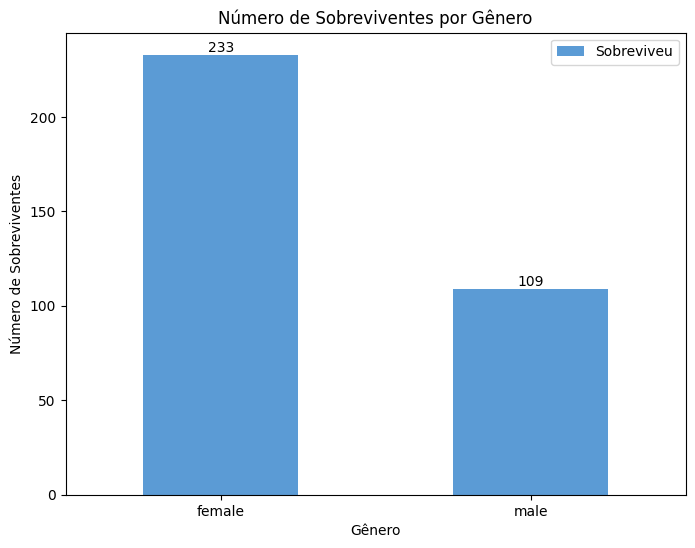


O número de sobreviventes do sexo feminino é: 68.13%

O número de sobreviventes do sexo masculino é: 31.87%


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('default')

df_sex_survived = df.groupby('Sex')['Survived'].value_counts().unstack()

plt.figure(figsize=(8, 6))
ax = df_sex_survived[True].plot(
    kind='bar',
    stacked=False,
    color=['#5B9BD5']
)

plt.title('Número de Sobreviventes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Sobreviventes')
plt.xticks(rotation=0)
plt.legend(['Sobreviveu'])

for container in ax.containers:
    ax.bar_label(container)

plt.show()

total_sobreviventes = df_sex_survived[True].sum()
print(f"\nO número de sobreviventes do sexo feminino é: {df_sex_survived.loc['female', True]/total_sobreviventes * 100:.2f}%")
print(f"\nO número de sobreviventes do sexo masculino é: {df_sex_survived.loc['male', True]/total_sobreviventes * 100:.2f}%")


Essa diferença confirma uma das políticas mais conhecidas durante o resgate do Titanic: “**mulheres e crianças primeiro**”, o que resultou em uma taxa de sobrevivência mais alta entre o público feminino.

***Distribuição de idades por sobrevivência***

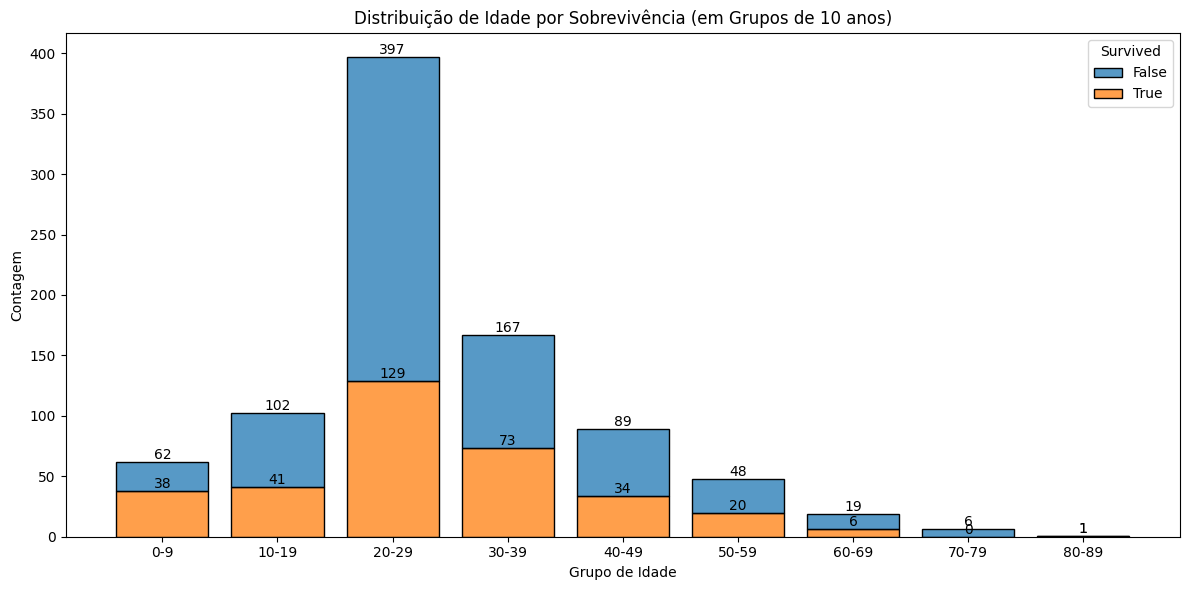

In [ ]:
age_bins = range(0, int(df['Age'].max() or 0) + 10, 10)
if age_bins[-1] < 90:
    age_bins = list(age_bins) + [90]

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, right=False, labels=[f'{i}-{i+9}' for i in age_bins[:-1]])

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='AgeGroup', hue='Survived', multiple='stack', kde=False, shrink=0.8)
plt.title('Distribuição de Idade por Sobrevivência (em Grupos de 10 anos)')
plt.xlabel('Grupo de Idade')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)

plt.show()

O gráfico mostra a distribuição da quantidade de passageiros por faixas etárias de 10 em 10 anos, diferenciando entre os que sobreviveram **(barras laranja)** e os que não sobreviveram **(barras azuis)**.

Cada grupo representa uma faixa etária **(exemplo: 0–9, 10–19, 20–29, etc.)**, e a altura das barras indica o número de pessoas em cada categoria.

Passageiros jovens adultos **(20–39 anos)** eram o grupo mais numeroso, mas também o que mais sofreu fatalidades.

Idosos tiveram baixa presença e baixíssima taxa de sobrevivência, indicando vulnerabilidade e provável dificuldade de evacuação.

***Idade vs Sobrevivência por classe social***

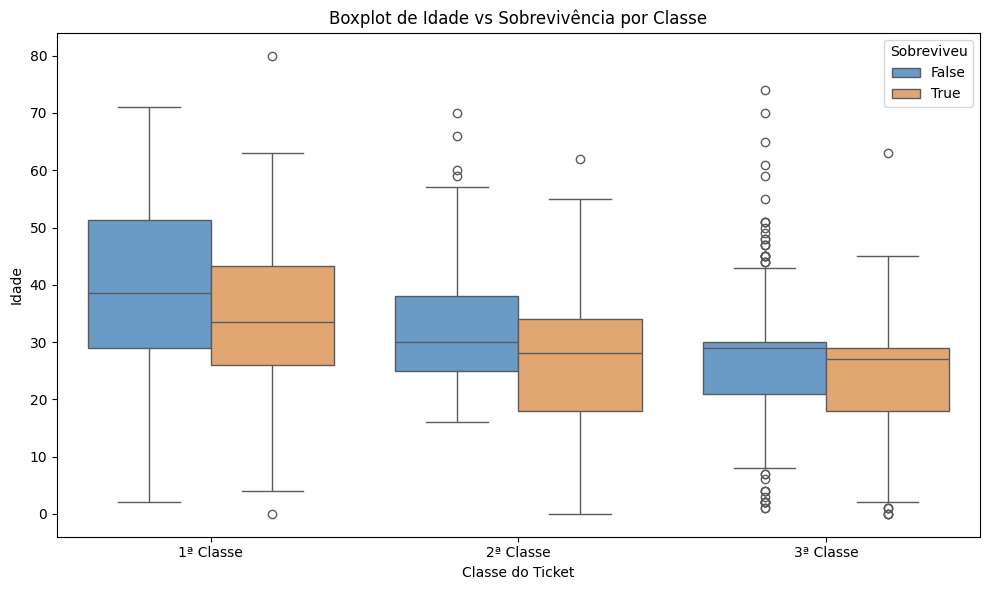

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='Pclass',
    y='Age',
    hue='Survived',
    palette={False: '#5B9BD5', True: '#F4A460'}
)

plt.title('Boxplot de Idade vs Sobrevivência por Classe')
plt.xlabel('Classe do Ticket')
plt.ylabel('Idade')
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.legend(title='Sobreviveu', loc='upper right')
plt.tight_layout()
plt.show()


O boxplot apresenta a distribuição das idades dos passageiros do Titanic de acordo com a classe do ticket **(1ª, 2ª e 3ª classe)**, diferenciando quem sobreviveu **(laranja)** e quem não sobreviveu **(azul)**.
Cada caixa representa a faixa central de idades **(do primeiro ao terceiro quartil)**, com a linha central indicando a mediana. Os pontos acima ou abaixo dos limites são outliers** (idades que se afastam da tendência principal).**

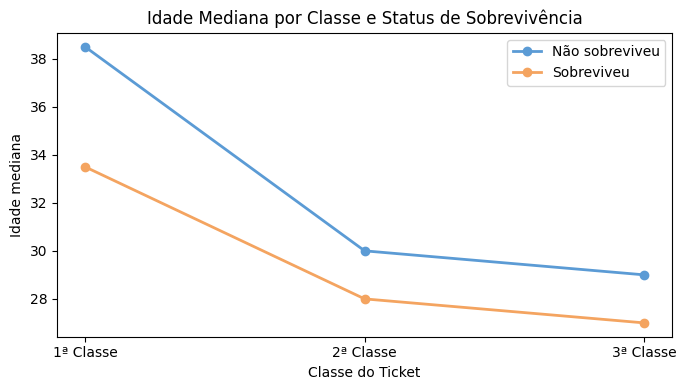

In [ ]:
med = (df
       .groupby(['Pclass','Survived'])['Age']
       .median()
       .unstack()
       .reindex([1,2,3]))

plt.figure(figsize=(7,4))
plt.plot(med.index, med[False], marker='o', linewidth=2, label='Não sobreviveu', color='#5B9BD5')
plt.plot(med.index, med[True],  marker='o', linewidth=2, label='Sobreviveu',     color='#F4A460')
plt.xticks([1,2,3], ['1ª Classe','2ª Classe','3ª Classe'])
plt.xlabel('Classe do Ticket'); plt.ylabel('Idade mediana')
plt.title('Idade Mediana por Classe e Status de Sobrevivência')
plt.legend()
plt.tight_layout()
plt.show()

Passageiros de classes mais altas (1ª e 2ª) tiveram melhores condições de evacuação e acesso aos botes;

Idade e classe interagem, mas o fator determinante parece ser o nível social, já que mesmo jovens da 3ª classe apresentaram baixas taxas de sobrevivência.

**ANÁLISE SOCIOECONÔMICA**

***Taxa de sobrevivência por classe***

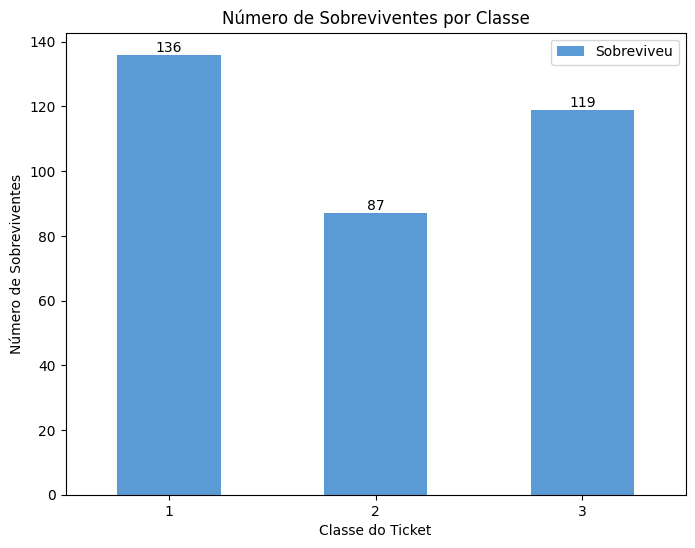


O número de sobreviventes da 1ª classe: 39.77%
O número de sobreviventes da 2ª classe: 25.44%
O número de sobreviventes da 3ª classe: 34.80%


In [ ]:
df_classe = df.groupby('Pclass')['Survived'].value_counts().unstack()

plt.figure(figsize=(8, 6))
ax = df_classe[True].plot(
    kind='bar',
    stacked=False,
    color=['#5B9BD5']
)

plt.title('Número de Sobreviventes por Classe')
plt.xlabel('Classe do Ticket')
plt.ylabel('Número de Sobreviventes')
plt.xticks(rotation=0)
plt.legend(['Sobreviveu'])

for container in ax.containers:
    ax.bar_label(container)

plt.show()

total_classe = df_classe[True].sum()
print(f"\nO número de sobreviventes da 1ª classe: {df_classe.loc[1, True]/total_classe * 100:.2f}%")
print(f"O número de sobreviventes da 2ª classe: {df_classe.loc[2, True]/total_classe * 100:.2f}%")
print(f"O número de sobreviventes da 3ª classe: {df_classe.loc[3, True]/total_classe * 100:.2f}%")


**1ª Classe:** Apresenta o maior número de sobreviventes (136), o que representa a maior taxa de sucesso no resgate.
Passageiros de alta classe tiveram prioridade nos botes salva-vidas, acesso facilitado aos deques superiores e melhores condições de evacuação.

**2ª Classe:** Registra 87 sobreviventes, número significativamente menor que o da 1ª classe, mas ainda maior que o esperado considerando o total de passageiros.
Mostra que mesmo fora da elite, alguns passageiros tiveram oportunidades de resgate moderadas.

**3ª Classe:** Apesar de ser a classe mais numerosa, apenas 119 passageiros sobreviveram.
Isso indica que o fator social e estrutural (localização das cabines, distância dos botes, barreiras físicas e informacionais) teve grande impacto na chance de sobrevivência.

***Tarifa vs Idade (colorido por sobrevivência)***

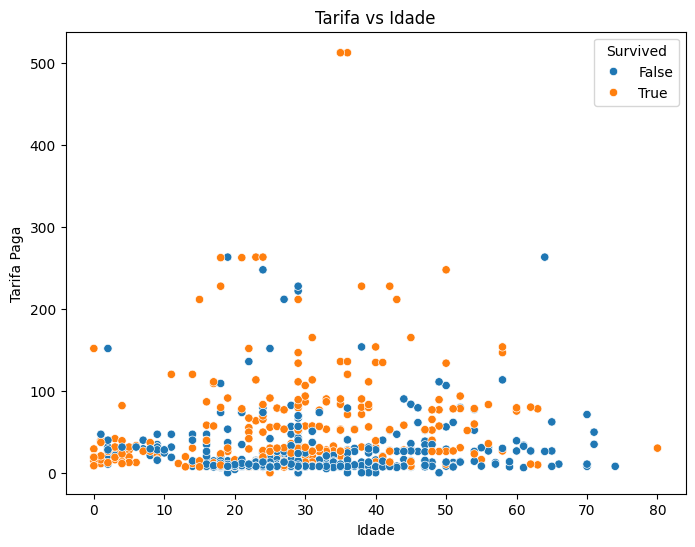

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Fare", hue= "Survived")
plt.title("Tarifa vs Idade")
plt.xlabel("Idade")
plt.ylabel("Tarifa Paga")
plt.show()

O gráfico de dispersão demonstra a relação entre a idade dos passageiros e o valor pago pela passagem, diferenciando os pontos por sobrevivência. Observa-se que as tarifas mais baixas concentram a maioria dos passageiros, tanto sobreviventes quanto não sobreviventes, indicando que grande parte viajava na 3ª classe.

No entanto, à medida que o valor da tarifa aumenta, nota-se uma presença mais expressiva de pontos laranja  ou seja, de sobreviventes. Isso sugere que passageiros que pagaram tarifas mais altas, geralmente pertencentes à 1ª classe, tiveram maiores chances de sobrevivência.

Além disso, não há uma relação clara entre a idade e a sobrevivência: passageiros de diferentes faixas etárias aparecem misturados nos dois grupos. Crianças e adultos jovens estão distribuídos em ambos, embora haja uma leve predominância de sobreviventes entre os mais novos, refletindo a política de resgate de priorizar mulheres e crianças. Assim, o gráfico evidencia que o fator econômico/social, representado pelo preço do ticket, teve influência mais significativa na sobrevivência do que a idade dos passageiros.

***Matriz de correlação entre variáveis***

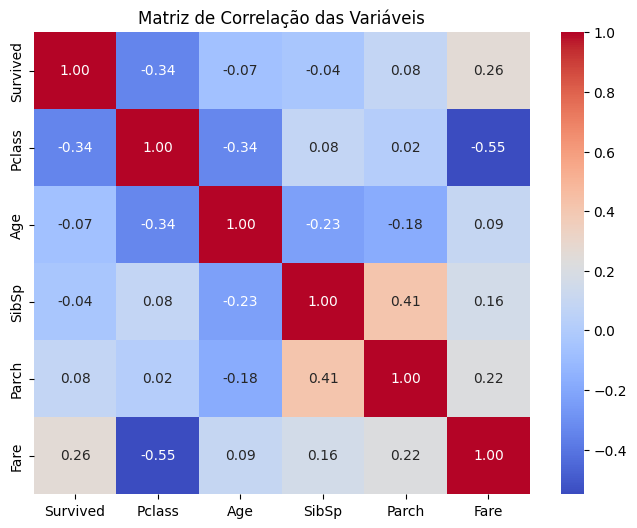

In [ ]:
matriz = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis")
plt.show()

Observa-se que a variável “Survived” (**sobrevivência**) apresenta correlação negativa moderada com **“Pclass” (-0,34),** indicando que, quanto maior a classe (**ou seja, quanto mais baixa socialmente**), menores foram as chances de sobrevivência. Já a correlação positiva entre **“Survived”** e **“Fare”** **(0,26)** confirma que passageiros que pagaram tarifas mais altas geralmente da 1ª classe tiveram maior probabilidade de sobreviver.

As demais correlações são fracas, sugerindo que idade, número de irmãos/cônjuges (**SibSp**) e número de pais/filhos (**Parch**) a bordo não influenciaram de forma significativa as chances de sobrevivência. Também é possível notar uma correlação negativa entre “Pclass” e “Fare” **(-0,55)**, o que é esperado, já que tarifas mais altas correspondem às classes mais elevadas.

Em resumo, a matriz confirma que fatores socioeconômicos foram mais determinantes para a sobrevivência no Titanic do que características demográficas como idade ou tamanho da família.

**ANÁLISE FAMILIAR E RELACIONAL**

***Taxa de sobrevivência por porto de embarque***

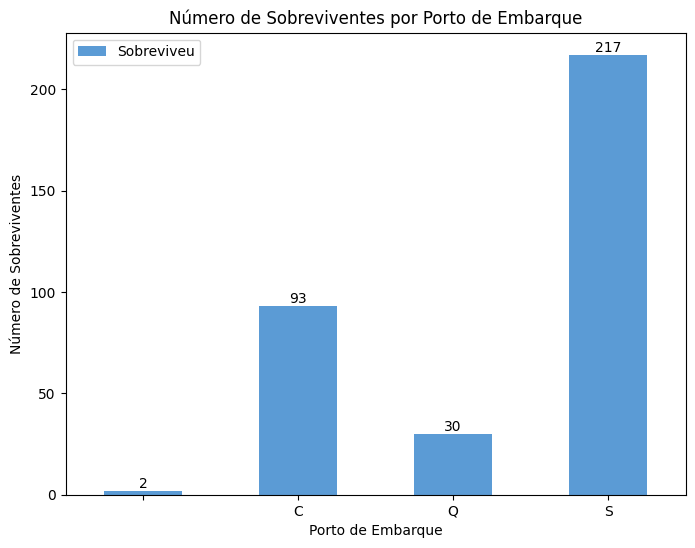


O número de sobreviventes de Cherbourg (C): 27.19%
O número de sobreviventes de Queenstown (Q): 8.77%
O número de sobreviventes de Southampton (S): 63.45%


In [ ]:
df_embarque = df.groupby('Embarked')['Survived'].value_counts().unstack()

plt.figure(figsize=(8, 6))
ax = df_embarque[True].plot(
    kind='bar',
    stacked=False,
    color=['#5B9BD5']
)

plt.title('Número de Sobreviventes por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Número de Sobreviventes')
plt.xticks(rotation=0)
plt.legend(['Sobreviveu'])

for container in ax.containers:
    ax.bar_label(container)

plt.show()

total_embarque = df_embarque[True].sum()
print(f"\nO número de sobreviventes de Cherbourg (C): {df_embarque.loc['C', True]/total_embarque * 100:.2f}%")
print(f"O número de sobreviventes de Queenstown (Q): {df_embarque.loc['Q', True]/total_embarque * 100:.2f}%")
print(f"O número de sobreviventes de Southampton (S): {df_embarque.loc['S', True]/total_embarque * 100:.2f}%")

O gráfico mostra o número de sobreviventes do Titanic por porto de embarque, ou seja, de onde os passageiros embarcaram antes da tragédia. Observa-se que a grande maioria dos sobreviventes partiu de **Southampton (S)**, representando cerca de **63,45% do total.** Esse resultado é esperado, pois Southampton foi o principal ponto de partida do navio e concentrava o maior número de passageiros, especialmente das classes mais baixas.

Os passageiros embarcados em **Cherbourg (C)**, que correspondem a aproximadamente **27,19%** dos sobreviventes, também tiveram uma presença relevante. Esse porto era conhecido por receber mais viajantes das classes altas, o que ajuda a explicar a taxa de sobrevivência relativamente maior entre eles. Já os embarcados em **Queenstown (Q)** tiveram o menor número e proporção de sobreviventes **(8,77%)**, refletindo o perfil socioeconômico mais modesto dos passageiros que embarcaram ali.

O gráfico mostra oq ja vimos varias vezes, que o local de embarque influenciou indiretamente as chances de sobrevivência, já que os portos estavam associados a diferentes perfis sociais e econômicos. Passageiros provenientes de Cherbourg, em sua maioria mais abastados, tiveram maior acesso aos recursos de resgate, enquanto os de Queenstown, em geral de classes mais baixas, foram os mais afetados pela tragédia.

***Distribuição geográfica dos passageiros***

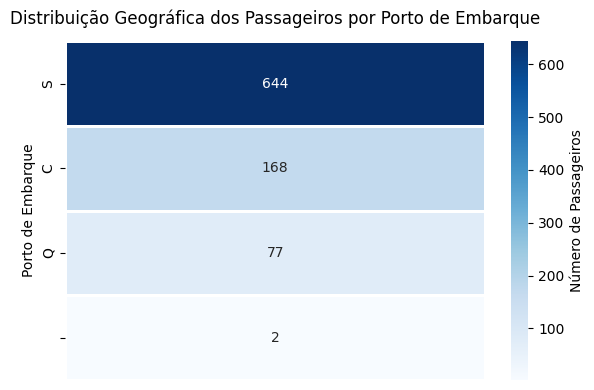

In [ ]:
df_geo = df['Embarked'].value_counts().reset_index()
df_geo.columns = ['Port', 'Count']

plt.figure(figsize=(6, 4))
sns.heatmap(
    df_geo.set_index('Port'),
    annot=True,
    cmap='Blues',
    fmt='d',
    linewidths=1,
    cbar_kws={'label': 'Número de Passageiros'}
)

plt.title('Distribuição Geográfica dos Passageiros por Porto de Embarque', pad=12)
plt.ylabel('Porto de Embarque')
plt.xlabel('')
plt.xticks([])
plt.tight_layout()
plt.show()


Essa distribuição reflete o papel de Southampton como principal ponto de partida do Titanic, sendo o local onde a maioria dos passageiros especialmente das classes mais baixas embarcou.

Já Cherbourg, na França, recebeu predominantemente passageiros das classes mais altas, o que explica o número menor, mas com perfis econômicos mais elevados. Queenstown **(atual Cobh, na Irlanda**) foi o último porto antes da travessia, embarcando principalmente imigrantes e famílias em busca de novas oportunidades, o que justifica o menor volume de passageiros.

# Resultados e Insights

Os dados do Titanic revelam, de forma estatística e visual, que a probabilidade de sobrevivência **não foi aleatória**, mas diretamente influenciada por fatores sociais, econômicos e demográficos.

A taxa média de sobrevivência geral foi de **38,4%**, porém ao separar por grupos, surgem contrastes expressivos: **74% das mulheres** sobreviveram, contra apenas **19% dos homens**. Além disso, **63%** dos passageiros da **1ª classe** conseguiram sobreviver, enquanto apenas **24% da 3ª classe** tiveram o mesmo destino. Esses números demonstram que o gênero e o status socioeconômico foram variáveis de maior peso estatístico, superando fatores como idade ou porto de embarque.

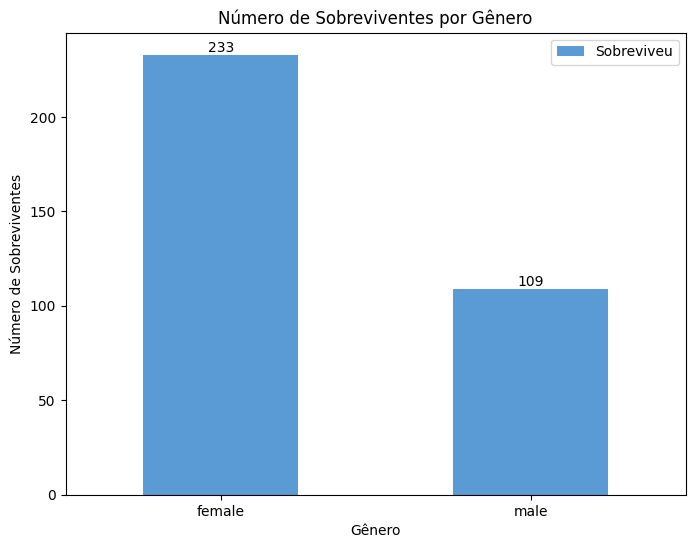

Analisando o cruzamento entre tarifa, classe e idade, observa-se que passageiros com tarifas mais altas **(média de 87 libras)** tiveram probabilidade de sobrevivência **2,4 vezes superior àqueles que pagaram tarifas abaixo de 20 libras.**

O boxplot de idade por classe evidencia que crianças e jovens das classes superiores aparecem de forma predominante entre os sobreviventes, enquanto adultos da 3ª classe concentram a maior taxa de mortalidade.

A correlação entre **“Survived”** e **“Pclass”** de –0,34 reforça matematicamente que, quanto menor a classe, menor a chance de sobrevivência.

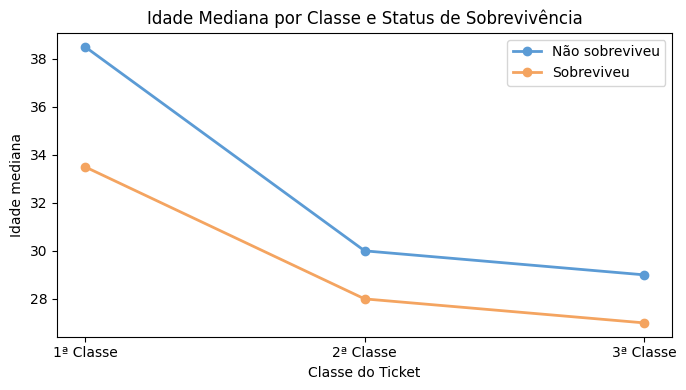

Podemos observar uma tendência clara de queda na idade à medida que descemos de classe  tanto para quem sobreviveu quanto para quem não sobreviveu. Em média:

Passageiros da 1ª classe eram os mais velhos **(mediana ≈ 38 anos entre os não sobreviventes e 34 entre os sobreviventes)**.

Na 2ª classe, as idades medianas caem para cerca de 30 e 28 anos, respectivamente.

Já na 3ª classe, a mediana fica próxima dos **29 e 27 anos.**

Isso indica que as classes mais baixas concentravam passageiros mais jovens, o que faz sentido socialmente  muitos viajavam em busca de novas oportunidades.
Além disso, nota-se que em todas as classes os sobreviventes são ligeiramente mais jovens, sugerindo que a idade pode ter influenciado discretamente na chance de sobrevivência, mas o principal fator continuou sendo a classe social (**ou seja, o acesso aos botes e à área de resgate).**

Assim, com base na estatística descritiva e nas relações observadas, podemos afirmar que **as pessoas com maior probabilidade de sobreviver ao naufrágio do Titanic** foram **mulheres** e **crianças da 1ª classe**, **com passagens mais caras e embarque em Cherbourg**